## Assignment : Linear Regression
### -- Adarsh V Shetty

`Problem Statement:` A Chinese automobile company `Geely Auto` aspires to enter the US market, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know the following:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data



In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# For our Analysis, we only need the name of the company, let us extract the company name from carname and delete carName
df['company'] = df['CarName'].str.split(" ", n = 1, expand = True)[0].str.lower()
df.drop(['CarName'], axis = 1, inplace = True)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [5]:
print(df.shape)


(205, 26)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

- We do not have null values, hence clean or imputing null/Na values is not required

In [7]:
df.company.value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
vw              2
maxda           2
porcshce        1
mercury         1
vokswagen       1
toyouta         1
Name: company, dtype: int64

In [8]:
# There are few spelling errors in the Comapny Names, let us correct them
replace_values={ 'porcshce' : 'porsche', 'toyouta' : 'toyota', 'vokswagen' : 'volkswagen', 'vw' : 'volkswagen', 'maxda':'mazda' }
df.company.value_counts()
df = df.replace({"company": replace_values})
df.company.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: company, dtype: int64

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- Looks like there is no significant outliers when we see the values of independent variables

## Step 2: Visualising the Data

<Figure size 1440x2160 with 0 Axes>

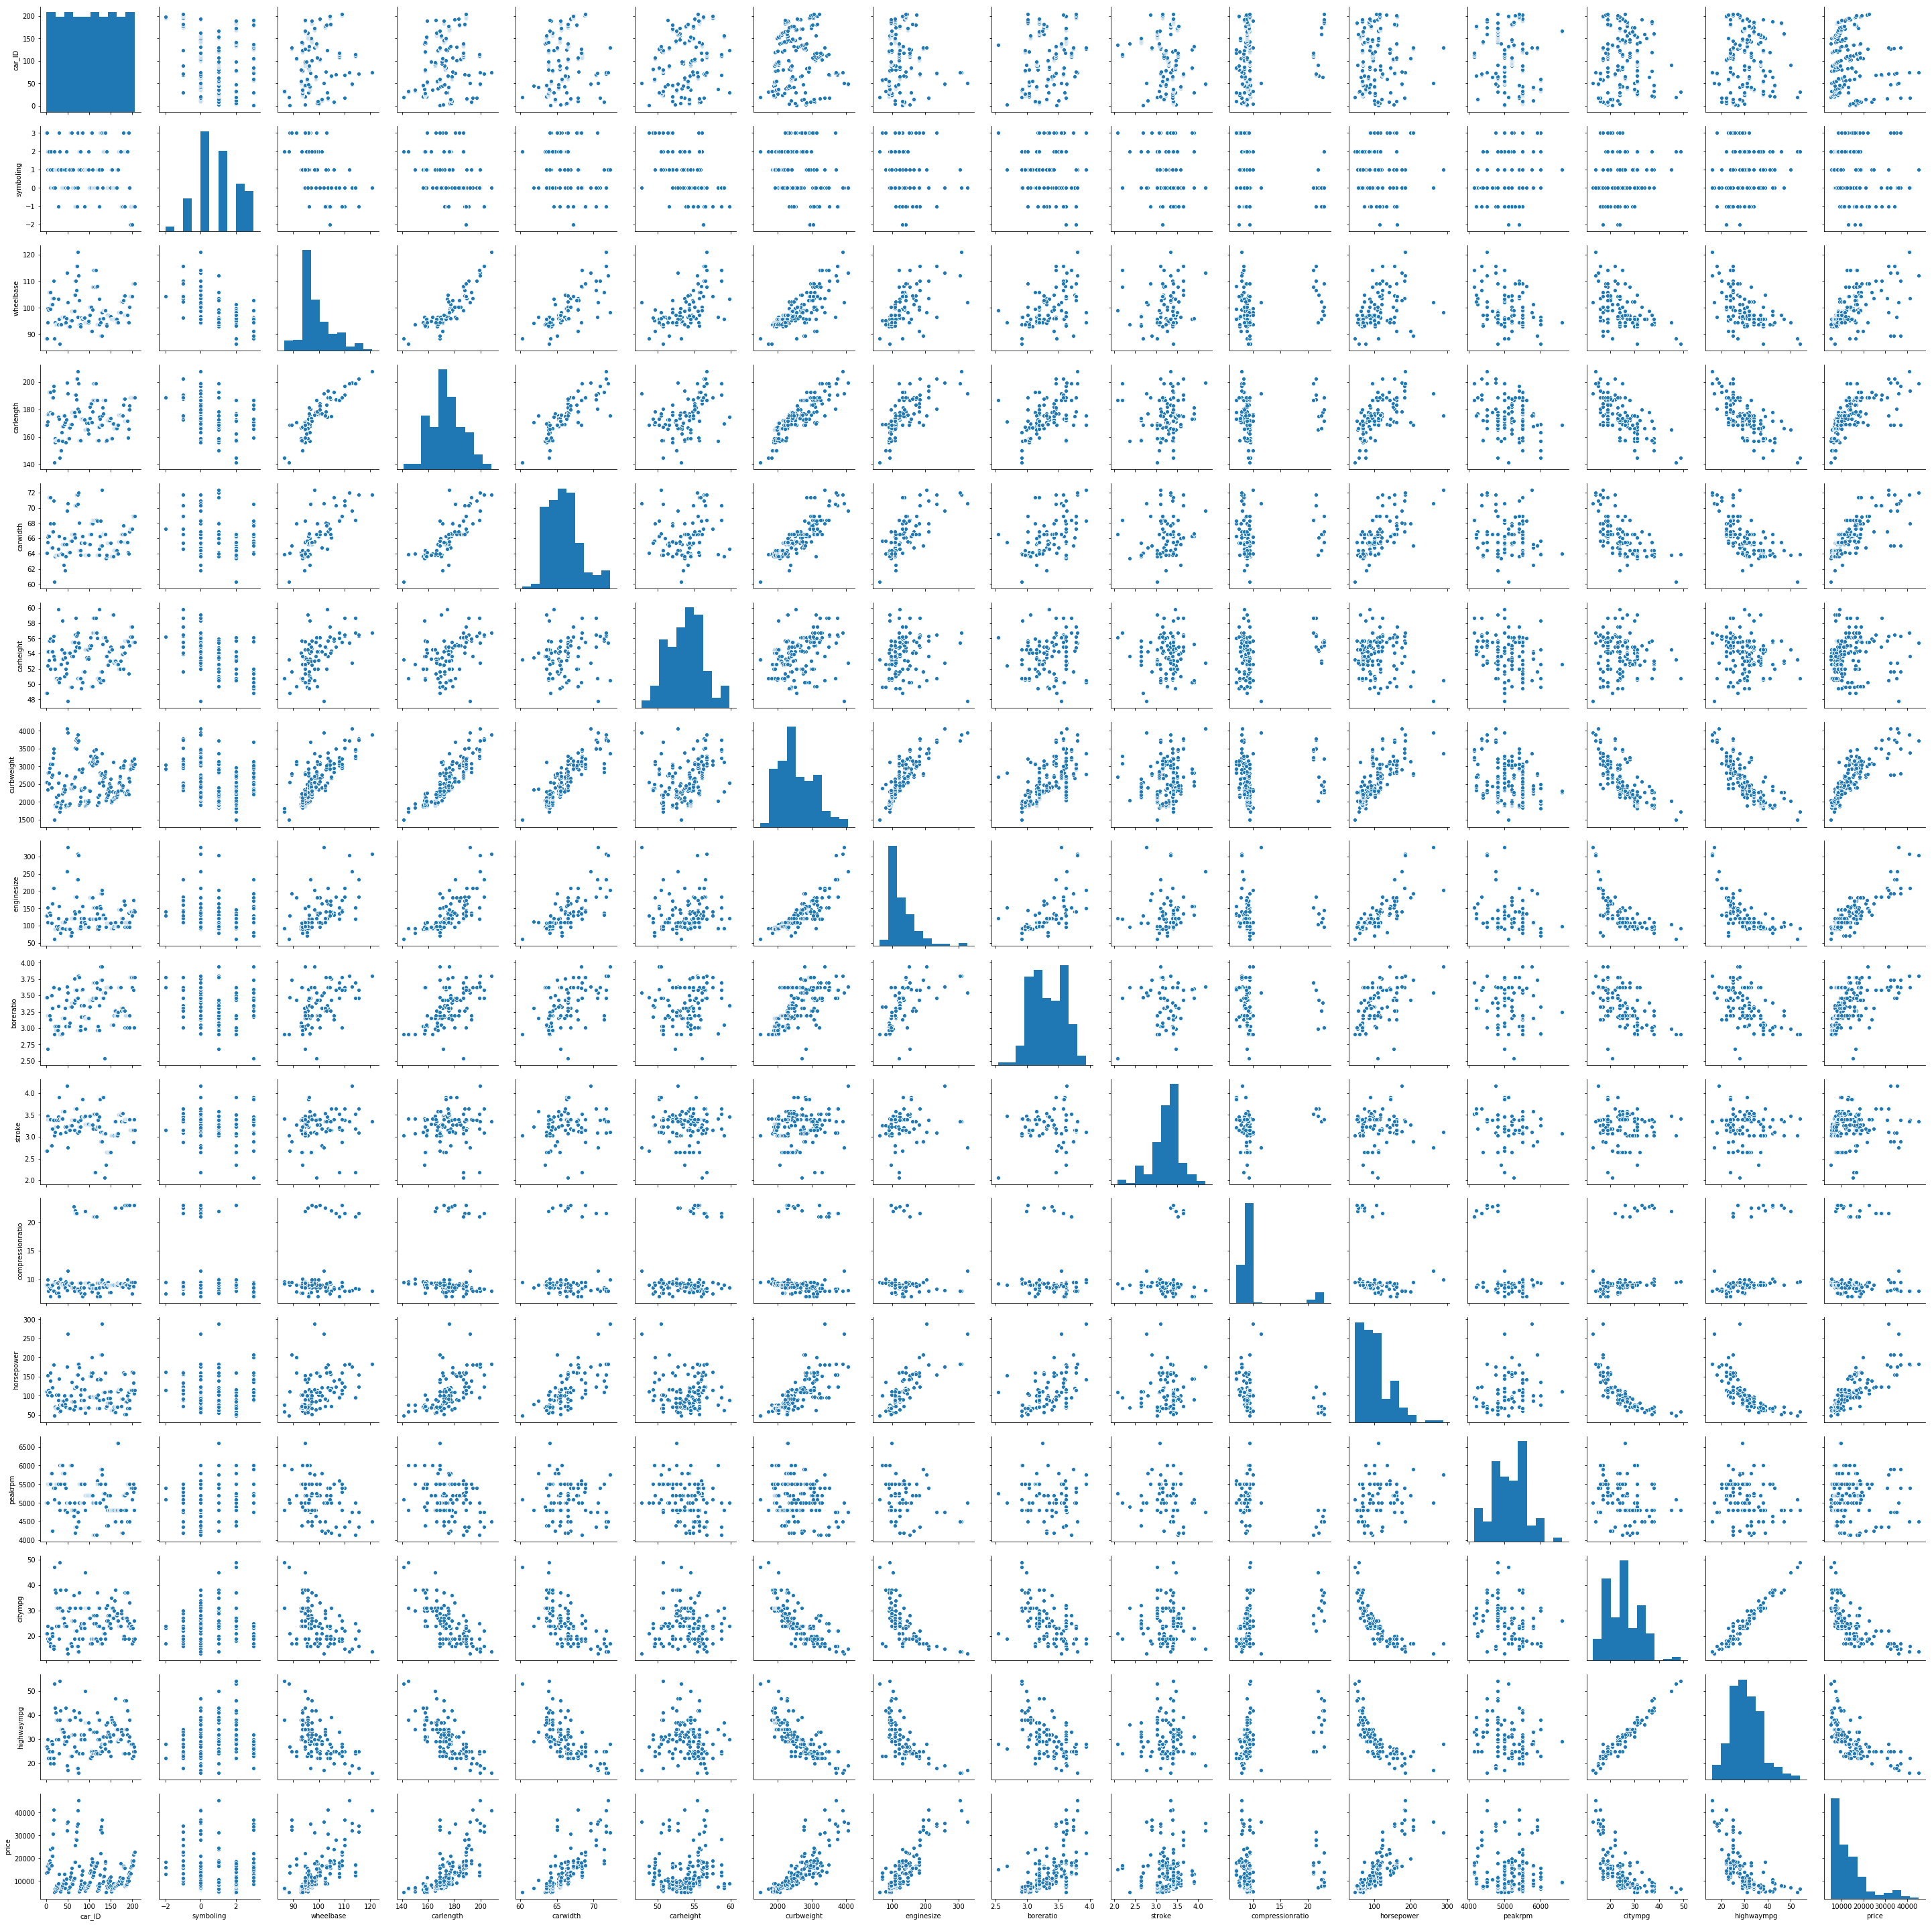

In [10]:
#Let us try and visualize the numerical variables using Pair Plot
## Plotting large size figure as the number of data is more
plt.figure(figsize=(20,30))
sns.pairplot(df)
plt.show()

#### Observations:
- Looking at the scatter plot of the numerical variables of the data set, following are few observations
     - Looks like Price has some `positive correlation` going on with variables such as 'wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize','boreratio','horsepower'
     - Looks like Price has some `negative correlation` going on with variables such as 'citympg' and 'higwaympg'

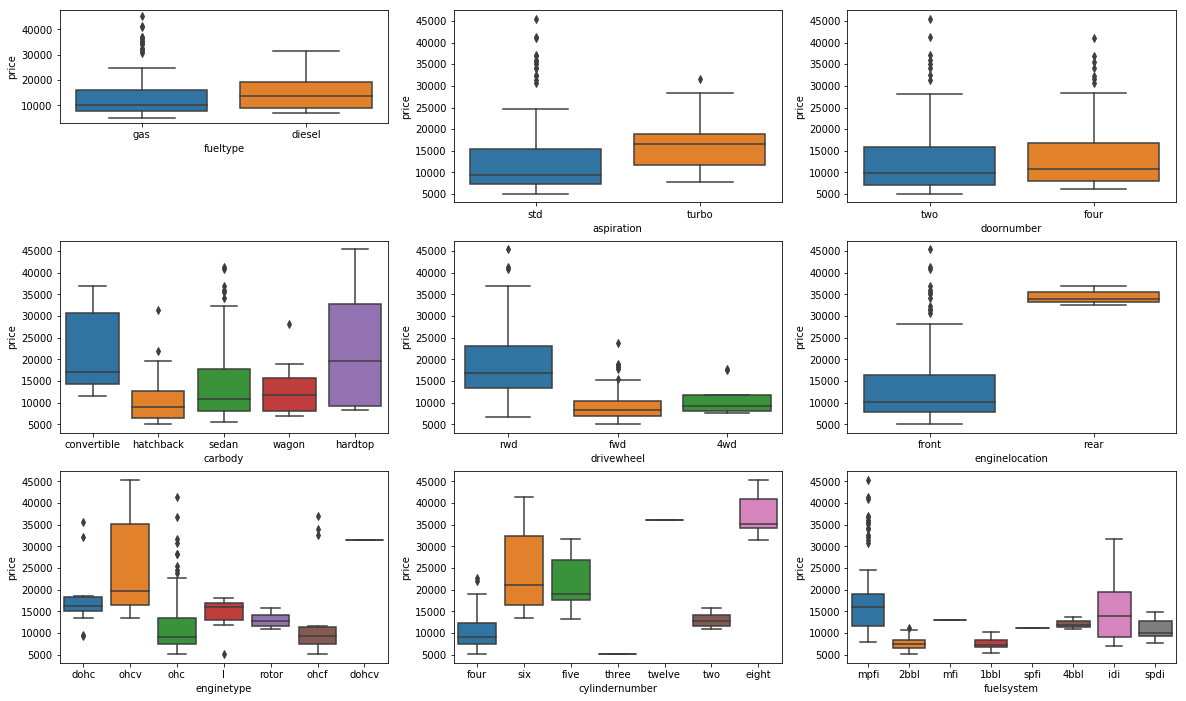

In [11]:
## Visualizing Categorical Variables

plt.figure(figsize=(20, 12))
plt.subplot(5,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

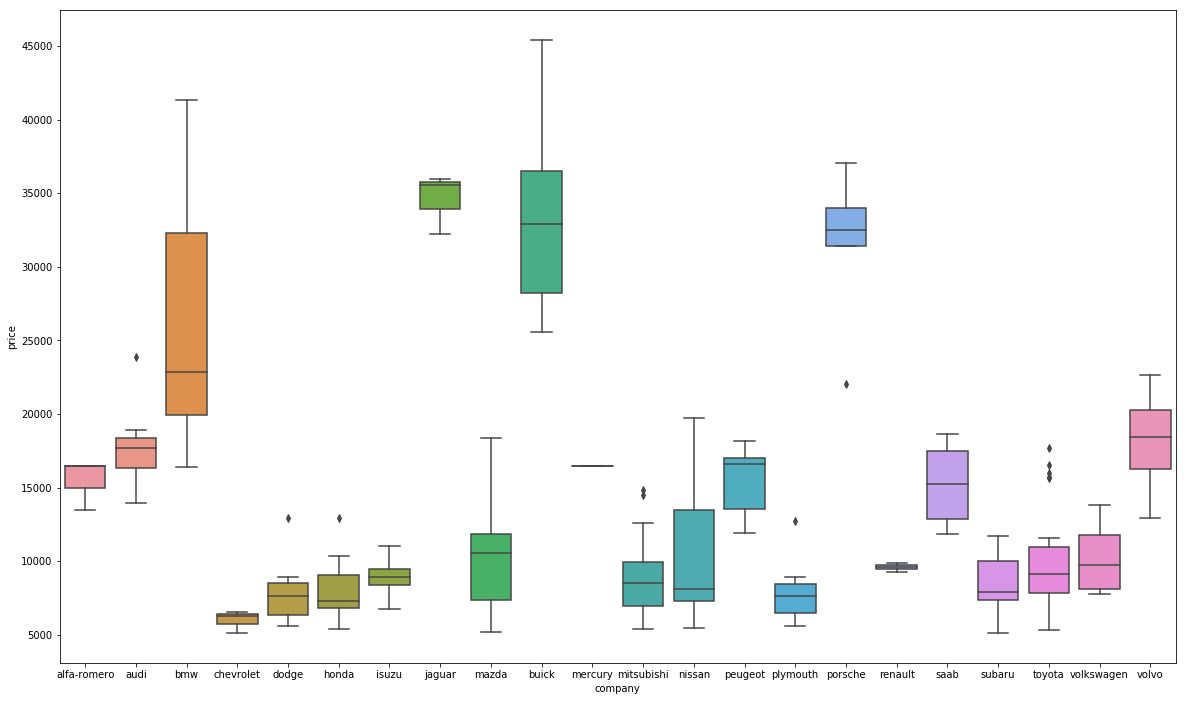

In [12]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'company', y = 'price', data = df)
plt.show()

#### Observations :
- `Fueltype` : Diesel cars ar slighlty higher priced.
- `aspiration` : turbo cars are higher priced than std.
- `doornumber` : Both 2 and 4 doors variant seem to have similar pricing.
- `carbody` : convertible and hardtop cars are higher priced than other variants.
- `drivewheel` : 'rwd' category drivewheel cars are highly  priced.
- `enginelocation` : front mounted engine cars are priced less than rear mounted engines, rear mounted engines are common in sports cars and hence the price.
- `enginetype` : ohcv type have high price range than others.
- `cylindernumber` : six cylinder engines and 8 cylinder engine cars are on a higher price range.
- `fuelsystem` : idi and mpfi type fuel system are on higher price range.
- `company` : - BMW,jaguar,buick,porche manufactures expensive cars

## Step 3: Preparing the Data

#### Understanding/encoding from the above table

- `Fueltype_gas`:
    - 0 - diesel
    - 1 - gas
- `aspiration_turbo`:
    - 0 - std
    - 1- turbo
- `doornumber_two`:
    - 0 - 4 doors
    - 1 - 2 doors
- `enginelocation_rear`:
    - 0 - front mounted engine
    - 1 - rear mounted engine
- `drivewheel_fwd/drivewheel_rwd`
    - 00 - 4wd
    - 01 - rwd
    - 10 - fwd


In [13]:
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(df[['fueltype','aspiration','doornumber','enginelocation','drivewheel','carbody','enginetype','cylindernumber','fuelsystem']]).toarray()
features = pd.DataFrame(feature_arr, columns=ohe.get_feature_names())
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
x0_diesel         205 non-null float64
x0_gas            205 non-null float64
x1_std            205 non-null float64
x1_turbo          205 non-null float64
x2_four           205 non-null float64
x2_two            205 non-null float64
x3_front          205 non-null float64
x3_rear           205 non-null float64
x4_4wd            205 non-null float64
x4_fwd            205 non-null float64
x4_rwd            205 non-null float64
x5_convertible    205 non-null float64
x5_hardtop        205 non-null float64
x5_hatchback      205 non-null float64
x5_sedan          205 non-null float64
x5_wagon          205 non-null float64
x6_dohc           205 non-null float64
x6_dohcv          205 non-null float64
x6_l              205 non-null float64
x6_ohc            205 non-null float64
x6_ohcf           205 non-null float64
x6_ohcv           205 non-null float64
x6_rotor          205 non-null float6

In [14]:
features.drop(['x0_diesel','x1_std','x2_four','x3_front','x4_4wd','x5_convertible','x6_dohc','x7_eight','x8_1bbl'], axis = 1, inplace = True)

In [15]:
features.shape

(205, 29)

In [16]:
# Add the results to the original dataframe
df = pd.concat([df, features], axis = 1)

# drop original columns which were categorical which were used to create dummy variable columns
df.drop(['fueltype','aspiration','doornumber','enginelocation','drivewheel','carbody','enginetype','cylindernumber','fuelsystem'],axis = 1, inplace = True)

In [17]:
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,x7_three,x7_twelve,x7_two,x8_2bbl,x8_4bbl,x8_idi,x8_mfi,x8_mpfi,x8_spdi,x8_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
#rename column names to more meaningful names
df.rename(columns={"x0_gas": "fuelType_gas", 
                   "x1_turbo": "asp_turbo",
                   "x2_two":"doors_2",
                   "x3_rear":"engine_rear",
                   "x4_fwd":"drive_fwd","x4_rwd":"drive_rwd",
                   "x5_hardtop":"body_hardtop","x5_hatchback":"body_hatchback","x5_sedan":"body_sedan","x5_wagon":"body_wagon",
                   "x6_dohcv":"eType_dohcv","x6_l":"eType_l","x6_ohc":"eType_ohc","x6_ohcf":"eType_ohcf" ,"x6_ohcv":"eType_ohcv","x6_rotor":"eType_rotor",
                  "x7_twelve":"cylinder_twelve","x7_five":"cylinder_five","x7_four":"cylinder_four","x7_six":"cylinder_six","x7_three":"cylinder_three","x7_two":"cylinder_two",
                  "x8_2bbl":"fs_2bbl","x8_4bbl":"fs_4bbl","x8_idi":"fs_idi","x8_mfi":"fs_mfi","x8_mpfi":"fs_mpfi","x8_spdi":"fs_spdi","x8_spfi":"fs_spfi"},
                   inplace = True)
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylinder_three,cylinder_twelve,cylinder_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
company             205 non-null object
fuelType_gas        205 non-null float64
asp_turbo           205 non-null float64
doors_2             205 non-null float64
engine_rear         205 non-null float64
drive_fwd           205 non-null float64
drive_rwd 

## Step 4: Splitting the Data into Training and Testing Sets

In [20]:
cars = df
# we do not need company name for our analysis
cars.drop(['company'],axis = 1, inplace = True)

In [21]:
cars.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylinder_three,cylinder_twelve,cylinder_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
fuelType_gas        205 non-null float64
asp_turbo           205 non-null float64
doors_2             205 non-null float64
engine_rear         205 non-null float64
drive_fwd           205 non-null float64
drive_rwd           205 non-null float64
body_hard

In [23]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 45 columns):
car_ID              143 non-null int64
symboling           143 non-null int64
wheelbase           143 non-null float64
carlength           143 non-null float64
carwidth            143 non-null float64
carheight           143 non-null float64
curbweight          143 non-null int64
enginesize          143 non-null int64
boreratio           143 non-null float64
stroke              143 non-null float64
compressionratio    143 non-null float64
horsepower          143 non-null int64
peakrpm             143 non-null int64
citympg             143 non-null int64
highwaympg          143 non-null int64
price               143 non-null float64
fuelType_gas        143 non-null float64
asp_turbo           143 non-null float64
doors_2             143 non-null float64
engine_rear         143 non-null float64
drive_fwd           143 non-null float64
drive_rwd           143 non-null float64
body_hard

In [403]:
scaler = MinMaxScaler()
columns = df_train.columns
df_train[columns] = scaler.fit_transform(df_train[columns])

In [404]:
df_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylinder_three,cylinder_twelve,cylinder_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi
122,0.598039,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.612745,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
166,0.813725,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.004902,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199,0.975490,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [405]:
df_train.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylinder_three,cylinder_twelve,cylinder_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.478061,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.289106,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.232843,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.470588,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.718137,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


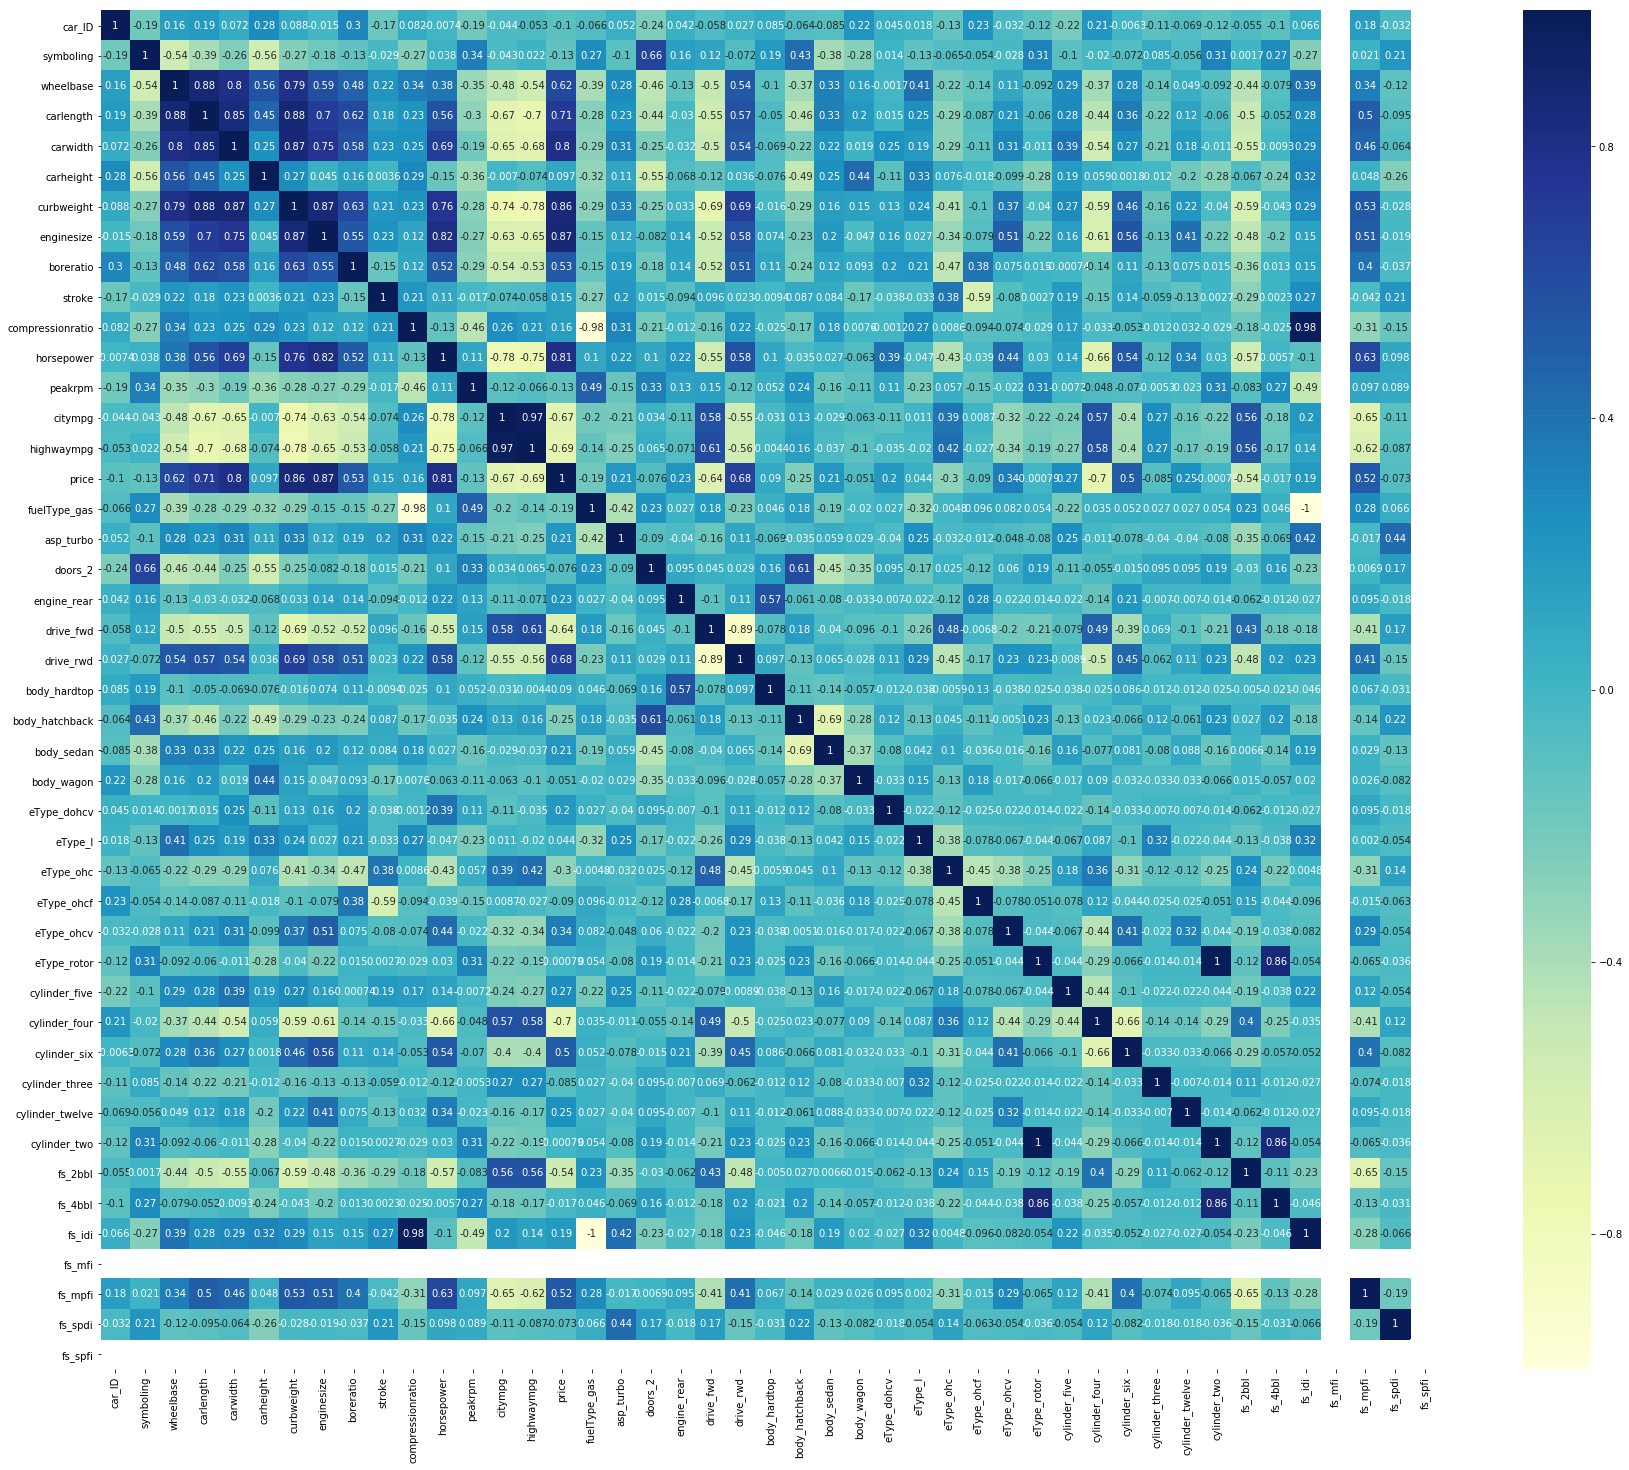

In [406]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Looking at the correlation heat map of all variables of the data set, following are few observations
     - Looks like Price has some `positive correlation` going on with variables such as 'wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize','boreratio','horsepower'
     - Looks like Price has some `negative correlation` going on with variables such as 'citympg' , 'higwaympg','drive wheel- fwd','4 cylinder' and 'fuel system type :2bbl'             
     - Strong `positive correlation` among the variables wheelbase ,carlength ,carwidth,curbweight,enginesize and boreratio  

## Step 5: Building a linear model :RFE

In [407]:
# Dividing into X and Y set
y_train = df_train.pop('price')
X_train = df_train

In [408]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [409]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 14),
 ('symboling', False, 21),
 ('wheelbase', False, 12),
 ('carlength', False, 23),
 ('carwidth', True, 1),
 ('carheight', False, 19),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 30),
 ('horsepower', False, 3),
 ('peakrpm', False, 5),
 ('citympg', False, 16),
 ('highwaympg', False, 17),
 ('fuelType_gas', False, 27),
 ('asp_turbo', False, 18),
 ('doors_2', False, 33),
 ('engine_rear', True, 1),
 ('drive_fwd', False, 32),
 ('drive_rwd', False, 20),
 ('body_hardtop', False, 9),
 ('body_hatchback', False, 8),
 ('body_sedan', False, 11),
 ('body_wagon', False, 10),
 ('eType_dohcv', False, 22),
 ('eType_l', False, 26),
 ('eType_ohc', False, 4),
 ('eType_ohcf', False, 13),
 ('eType_ohcv', True, 1),
 ('eType_rotor', True, 1),
 ('cylinder_five', False, 24),
 ('cylinder_four', False, 7),
 ('cylinder_six', False, 25),
 ('cylinder_three', True, 1),
 ('cylinder_twelve', True, 1),
 ('cylinder_two

In [410]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'engine_rear', 'eType_ohcv', 'eType_rotor', 'cylinder_three',
       'cylinder_twelve'],
      dtype='object')

In [411]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting a linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           6.81e-59
Time:                        21:02:47   Log-Likelihood:                 176.43
No. Observations:                 143   AIC:                            -330.9
Df Residuals:                     132   BIC:                            -298.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0286      0.033     

In [412]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.37
3,enginesize,9.66
2,curbweight,8.62
1,carwidth,4.54
4,boreratio,2.47
7,eType_ohcv,1.83
5,stroke,1.74
10,cylinder_twelve,1.67
8,eType_rotor,1.33
6,engine_rear,1.19


- Looks like curbweight has has VIF > 5 and high p- value
- Let us drop 'curbweight' and build our model again

In [413]:
X_train_new = X_train_rfe.drop(["curbweight"], axis = 1)
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     119.8
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           2.42e-59
Time:                        21:04:03   Log-Likelihood:                 174.92
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     133   BIC:                            -300.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0296      0.033     

In [414]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.35
2,enginesize,6.05
1,carwidth,3.13
3,boreratio,2.44
6,eType_ohcv,1.81
4,stroke,1.72
9,cylinder_twelve,1.55
7,eType_rotor,1.25
5,engine_rear,1.16
8,cylinder_three,1.05


- `engine size` has `VIF > 5`, Let us drop engine size and build the model again

In [415]:
X_train_new_1 = X_train_new.drop(["enginesize"], axis = 1)
# Adding a constant variable 
X_train_new_1 = sm.add_constant(X_train_new_1)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new_1).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     45.37
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           1.57e-34
Time:                        21:05:18   Log-Likelihood:                 110.67
No. Observations:                 143   AIC:                            -203.3
Df Residuals:                     134   BIC:                            -176.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2596      0.045     

In [416]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_1.values, i) for i in range(X_train_new_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.19
1,carwidth,2.23
2,boreratio,1.89
3,stroke,1.32
5,eType_ohcv,1.27
8,cylinder_twelve,1.15
7,cylinder_three,1.05
4,engine_rear,1.04
6,eType_rotor,1.00


In [417]:
X_train_new_2 = X_train_new_1.drop(["eType_rotor"], axis = 1)
# Adding a constant variable 
X_train_new_2 = sm.add_constant(X_train_new_2)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new_2).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     52.18
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           2.22e-35
Time:                        21:05:41   Log-Likelihood:                 110.60
No. Observations:                 143   AIC:                            -205.2
Df Residuals:                     135   BIC:                            -181.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2591      0.045     

In [418]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_2.values, i) for i in range(X_train_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.17
1,carwidth,2.23
2,boreratio,1.88
3,stroke,1.32
5,eType_ohcv,1.27
7,cylinder_twelve,1.15
6,cylinder_three,1.05
4,engine_rear,1.04


In [419]:
X_train_new_3 = X_train_new_2.drop(["stroke"], axis = 1)
# Adding a constant variable 
X_train_new_3 = sm.add_constant(X_train_new_3)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new_3).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     60.85
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           3.97e-36
Time:                        21:06:20   Log-Likelihood:                 110.19
No. Observations:                 143   AIC:                            -206.4
Df Residuals:                     136   BIC:                            -185.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2289      0.029     

In [420]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.31
1,carwidth,1.78
2,boreratio,1.60
4,eType_ohcv,1.22
6,cylinder_twelve,1.13
5,cylinder_three,1.05
3,engine_rear,1.04


In [421]:
X_train_new_4 = X_train_new_3.drop(["boreratio"], axis = 1)
# Adding a constant variable 
X_train_new_4 = sm.add_constant(X_train_new_4)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new_4).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     72.61
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           8.34e-37
Time:                        21:06:40   Log-Likelihood:                 109.52
No. Observations:                 143   AIC:                            -207.0
Df Residuals:                     137   BIC:                            -189.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2169      0.027     

In [422]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_4.values, i) for i in range(X_train_new_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.10
3,eType_ohcv,1.20
1,carwidth,1.17
5,cylinder_twelve,1.13
4,cylinder_three,1.05
2,engine_rear,1.00


In [423]:
X_train_new_5 = X_train_new_4.drop(["eType_ohcv"], axis = 1)
# Adding a constant variable 
X_train_new_5 = sm.add_constant(X_train_new_5)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new_5).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     89.03
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           3.04e-37
Time:                        21:07:14   Log-Likelihood:                 108.15
No. Observations:                 143   AIC:                            -206.3
Df Residuals:                     138   BIC:                            -191.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2242      0.027     

In [424]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_5.values, i) for i in range(X_train_new_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.88
1,carwidth,1.08
3,cylinder_three,1.05
4,cylinder_twelve,1.03
2,engine_rear,1.00


In [425]:
X_train_new_6 = X_train_new_5.drop(["cylinder_three"], axis = 1)
# Adding a constant variable 
X_train_new_6 = sm.add_constant(X_train_new_6)
# fitting a linear model
lm = sm.OLS(y_train,X_train_new_6).fit()
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sat, 30 Nov 2019   Prob (F-statistic):           1.51e-37
Time:                        21:07:53   Log-Likelihood:                 106.31
No. Observations:                 143   AIC:                            -204.6
Df Residuals:                     139   BIC:                            -192.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2125      0.027     

In [426]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_6.values, i) for i in range(X_train_new_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.47
1,carwidth,1.03
3,cylinder_twelve,1.03
2,engine_rear,1.00


## Step 6: Residual Analysis of the train data

In [367]:
y_train_price = lm.predict(X_train_new_6)

Text(0.5, 0, 'Errors')

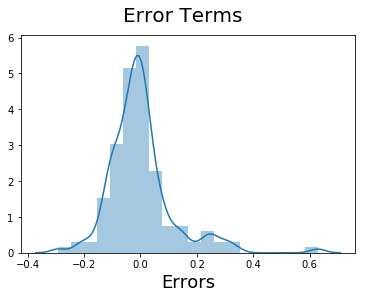

In [368]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

- The error term is normally distributed with the mean at 0

## Step 7: Making Predictions Using the Final Model

In [369]:
# Applying the scaling on the test sets
columns = df_test.columns
df_test[columns] = scaler.transform(df_test[columns])

In [370]:
df_test.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylinder_three,cylinder_twelve,cylinder_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.550601,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.290690,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.014706,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.323529,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571078,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.816176,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.985294,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [371]:
y_test = df_test.pop('price')
X_test = df_test

In [372]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(X_test)


,const,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylinder_three,cylinder_twelve,cylinder_two,fs_2bbl,fs_4bbl,fs_idi,fs_mfi,fs_mpfi,fs_spdi,fs_spfi
160,1.0,0.784314,0.4,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
186,1.0,0.911765,0.8,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,1.0,0.289216,0.6,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
165,1.0,0.808824,0.6,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140,1.0,0.686275,0.8,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
64,1.0,0.313725,0.4,0.420690,0.596748,0.516667,0.681416,0.363460,0.230189,0.563492,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
198,1.0,0.970588,0.0,0.610345,0.775610,0.575000,0.743363,0.603957,0.260377,0.746032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75,1.0,0.367647,0.6,0.555172,0.606504,0.641667,0.619469,0.551590,0.298113,0.873016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
172,1.0,0.843137,0.8,0.406897,0.570732,0.441667,0.460177,0.576804,0.320755,0.746032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104,1.0,0.509804,1.0,0.162069,0.481301,0.633333,0.168142,0.614042,0.452830,0.595238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [375]:
#Keeping the variables obtained after fitting a model
X_test_2 = X_test_1.loc[:,['const','carwidth','cylinder_twelve','engine_rear']]

# Making predictions using the fourth model
y_test_pred = lm.predict(X_test_2)

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

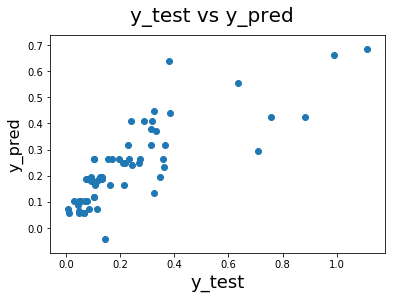

In [376]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [379]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6251402801257208